In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = data.iloc[:,3:5].values
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [4]:
# Clustering based on income and spending score
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 5, min_samples = 3)
model.fit(X)

DBSCAN(eps=5, min_samples=3)

In [5]:
# Checking the clusters formed by DBSCAN. -1 indicates an outlier.
labels = model.labels_
labels

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1,  6, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7, -1,  8, -1,  7,  9,  8,  9,  8, -1,  8,  9,  7,
        9,  8,  9,  8,  9,  7, 10,  7,  9,  7, 10,  8,  9,  7,  9,  7,  9,
        8,  9,  7,  9,  8,  9,  8, 10,  7,  9,  7, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [6]:
from sklearn import metrics

# Identifying the points which makes up our core points
sample_cores = np.zeros_like(labels, dtype = bool)
sample_cores[model.core_sample_indices_] = True

In [7]:
# Calculating the number of clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_clusters

12

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = labels
data_with_clusters.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,-1


<function matplotlib.pyplot.show>

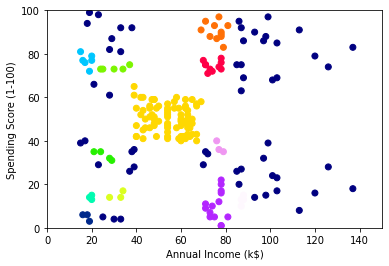

In [9]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=data_with_clusters['Cluster'],cmap='gist_ncar')
plt.xlim(0,150)
plt.ylim(0,100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show

In [10]:
# Assessing clustering performance
print(metrics.silhouette_score(X,labels))

0.13270067347083236
